In [6]:
# 1.Check for duplicates in the csv file
df = df.drop_duplicates()

In [7]:
# 2.Handle missing values
df = df.dropna(subset=['name', 'brand'])  # Example: dropping rows where 'name' or 'brand' is missing


In [8]:
# 3. Normalize text columns
df['name'] = df['name'].str.strip().str.lower()
df['brand'] = df['brand'].str.strip().str.lower()


In [9]:
# 4. Validate Data Consistency
# Example: Ensure discountPercentage is between 0 and 100
df = df[(df['discountPercentage'] >= 0) & (df['discountPercentage'] <= 100)]


In [10]:
# 5. Feature Engineering
# Example: Create a boolean column indicating if an item is on sale
df['onSale'] = df['discountPercentage'] > 0


In [12]:
# 6. Show the preprocessed data
print(df.head())

                                                name           brand  \
0                                 blouse - off white      anna field   
1  ladies open edge terry turn up pants - tracksu...  urban classics   
2  onlnoelle midi string skirt - a-line skirt - b...            only   
3                    stretch  - shorts - khaki stone  the north face   
4                                     hoodie - black        even&odd   

                                  sizes  \
0  6, 8, 10, 12, 16, 18, 20, 22, 24, 26   
1        XS, S, M, L, XL, 3XL, 4XL, 5XL   
2             XS, S, M, L, XL, XXL, 3XL   
3                            12, 14, 18   
4                           XS, S, M, L   

                                                skus  originalPrice  \
0  AN621E0AO-A110034000, AN621E0AO-A110036000, AN...          25.99   
1  UR621A01M-Q1100XS000, UR621A01M-Q11000S000, UR...          25.00   
2  ON321B1AF-Q1100XS000, ON321B1AF-Q11000S000, ON...          35.99   
3  TH321S01H-B110008000,

In [13]:
# Split the data
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['originalPrice', 'promotionalPrice', 'discountPercentage', 'discountAmount']]
y = df['onSale']  # Assuming 'onSale' is the target for classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Train and evaluate the models
# 1. Linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')


Linear Regression - MSE: 0.0806650854884259, R2: 0.6509658609782543


In [15]:
# Logisitic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train the model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression - Accuracy: {accuracy_logreg}')
print(classification_report(y_test, y_pred_logreg))


Logistic Regression - Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1396
        True       1.00      1.00      1.00       794

    accuracy                           1.00      2190
   macro avg       1.00      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190



In [16]:
# Support Vector Machine(SVM)
from sklearn.svm import SVC

# Train the model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM - Accuracy: {accuracy_svm}')
print(classification_report(y_test, y_pred_svm))


SVM - Accuracy: 0.9990867579908675
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1396
        True       1.00      1.00      1.00       794

    accuracy                           1.00      2190
   macro avg       1.00      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190



In [17]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree - Accuracy: {accuracy_dt}')
print(classification_report(y_test, y_pred_dt))


Decision Tree - Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1396
        True       1.00      1.00      1.00       794

    accuracy                           1.00      2190
   macro avg       1.00      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190



In [18]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest - Accuracy: {accuracy_rf}')
print(classification_report(y_test, y_pred_rf))


Random Forest - Accuracy: 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1396
        True       1.00      1.00      1.00       794

    accuracy                           1.00      2190
   macro avg       1.00      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190



In [19]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes - Accuracy: {accuracy_nb}')
print(classification_report(y_test, y_pred_nb))


Naive Bayes - Accuracy: 0.9917808219178083
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      1396
        True       0.98      1.00      0.99       794

    accuracy                           0.99      2190
   macro avg       0.99      0.99      0.99      2190
weighted avg       0.99      0.99      0.99      2190



In [20]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN - Accuracy: {accuracy_knn}')
print(classification_report(y_test, y_pred_knn))


KNN - Accuracy: 0.997716894977169
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1396
        True       0.99      1.00      1.00       794

    accuracy                           1.00      2190
   macro avg       1.00      1.00      1.00      2190
weighted avg       1.00      1.00      1.00      2190



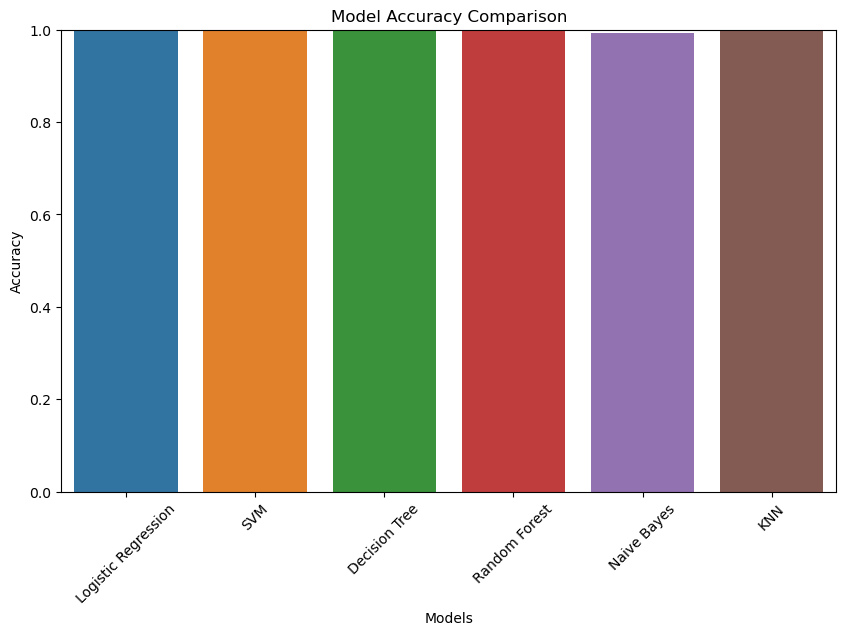

In [21]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Model performance metrics
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN']
accuracies = [accuracy_logreg, accuracy_svm, accuracy_dt, accuracy_rf, accuracy_nb, accuracy_knn]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
